# Análisis Estadístico de la Actividad Física y Transporte en Ecuador usando Python.


![Usabici](https://encolombia.com/wp-content/uploads/2017/11/Fomentar-Uso-Bicicleta.jpg)

- Fuente: Encuesta Multipropósito Diciembre 2019 - Módulo 6 actividad física y transporte.

In [475]:
#librerias

import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [476]:
#Leyendo la bdd de la Encuesta Multiproposito

path = "C:/Users/Diana/Ejercicios_jupiter_python/201912_multibdd_personas.csv"

bdd_multi = pd.read_csv(path, sep =';')

print(type(bdd_multi))

<class 'pandas.core.frame.DataFrame'>


In [477]:
#Dimensiones del dataframe
bdd_multi.shape

(40814, 81)

In [478]:
#Nombre de las variables

bdd_multi.columns

Index(['area', 'ciudad', 'conglomerado', 'vivienda', 'hogar', 'persona',
       's1p2', 's1p3', 's1p3b', 's1p4', 's1p5a', 's1p5b', 's1p6', 's1p7',
       's1p8', 's1p9', 's1p10', 's1p11', 's1p12a', 's1p12b', 's1p13', 's1p14a',
       's1p14c', 's2p1', 's2p2a', 's2p2b', 's2p3', 's2p41', 's2p42', 's2p43',
       's2p44', 's2p45', 's2p5', 's2p6', 's2p7a', 's2p7b', 's2p8', 's2p9',
       's2p10a', 's2p10b', 's6p1a', 's6p1b', 's6p2', 's6p3', 's6p4', 's6p4a',
       's6p4b', 's6p4c', 's6p4d', 's7p1a', 's7p1b', 's7p1a1', 's7p1b1',
       's7p1b2', 's7p1b3', 's7p1b4', 's7p1b5', 's7p1b6', 's7p2', 's7p211',
       's7p212', 's7p213', 's7p214', 's7p3', 's7p4', 's7p5', 's7p6', 's7p71',
       's7p72', 's7p73', 's7p74', 's7p75', 's7p76', 's7p77', 's7p78', 's7p79',
       'upm', 'estrato', 'fexp', 'id_hogar', 'id_per'],
      dtype='object')

In [479]:
#Seleccionar variables de interes
bdd_act = bdd_multi.loc[:, ['area', 'ciudad','s1p2', 's1p3','s1p12a','s6p1a', 
                            's6p1b', 's6p2', 's6p3', 's6p4', 's6p4a','s6p4b', 's6p4c', 's6p4d', 'fexp']]


In [480]:
#Dimensiones del dataframe
bdd_act.shape

(40814, 15)

In [481]:
#Filtrar población objetivo. Personas de 12 años o mas

mayores_act = bdd_act[bdd_act.s1p3>=12]
mayores_act = pd.DataFrame(mayores_act)

mayores_act.shape

(33236, 15)

### Dicionario de la base de datos

- **Area** :  Zona Urbano o Rural
- **Ciudad**: Ubicación geográfica codificada con la Diviión Politico-Administrativa
- **s1p2** :  Sexo
- **s1p3** :  Edad
- **s1p12a**: Nivel de instrucción
- **s6p1a**:  ¿Utiliza bicicleta?
- **s6p1b**:  ¿Con qué frecuencia la usa: ?
- **s6p2**:   En su rutina diaria ¿Qué medio utiliza principalmente (…) para trasladarse desde su hogar al trabajo, establecimiento educativo, etc.?
- **s6p3**:   ¿Cuál es la razón principal?
- **s6p4**:   En la semana pasada, ¿Hizo ejercicios ó practicó algún deporte?
- **s6p4a**:  ¿Cuánto tiempo? Lunes a viernes - Horas 
- **s6p4b**:  ¿Cuánto tiempo? Lunes a viernes - Minutos
- **s6p4c**:  ¿Cuánto tiempo? Sábado y domingo - Horas
- **s6p4d**:  ¿Cuánto tiempo? Sábado y domingo - Minutos
- **fexp**:    Factor de expansión

[cuestionario_multi_2019](https://www.ecuadorencifras.gob.ec/documentos/web-inec/Estadisticas_Sociales/TIC/2019/201912_Formulario_Multiproposito.pdf)


In [482]:
#Tipos de variables
mayores_act.dtypes

area        int64
ciudad      int64
s1p2        int64
s1p3        int64
s1p12a     object
s6p1a      object
s6p1b      object
s6p2       object
s6p3       object
s6p4       object
s6p4a      object
s6p4b      object
s6p4c      object
s6p4d      object
fexp      float64
dtype: object

In [483]:
#Reemplazando categorias de variables
mayores_act.s1p2 = mayores_act.s1p2.replace({1: "Hombre", 2: "Mujer"})
mayores_act.area = mayores_act.area.replace({1: "Urbano", 2: "Rural"})
mayores_act.s1p12a = mayores_act.s1p12a.replace({'1': "Ninguno", '2': "Alfabetizacion",'3': "Jardin", '4': "Primaria",
                                                 '5': "Basica", '6': "Secundaria",'7': "Bachillerato", '8': "Tecnologica",
                                                 '9': "Superior", '10': "Postgrado"})
mayores_act.s6p1a = mayores_act.s6p1a.replace({'1': "Si", '2': "No"})
mayores_act.s6p1b = mayores_act.s6p1b.replace({'1': "Diario", '2': "UnoSemana", '3': "UnoMes", '4': "UnoAnio"})
mayores_act.s6p2 = mayores_act.s6p2.replace({'1': "AutoSolo", '2': "AutoCompartido", '3': "TPublico", '4': "Bicicleta", 
                                             '5': "Caminar", '6': "Otro",'99': "No aplica" })
mayores_act.s6p3 = mayores_act.s6p3.replace({'1': "Comodidad", '2': "Necesidad", '3': "Seguridad", '4': "ConcienciaAmbiental",
                                             '5': "Salud/Deporte", '6': "AhorroDinero", '7': "Cercania"})
mayores_act.s6p4 = mayores_act.s6p4.replace({'1': "Si", '2': "No"})
mayores_act.head(10)
mayores_act.dtypes

area       object
ciudad      int64
s1p2       object
s1p3        int64
s1p12a     object
s6p1a      object
s6p1b      object
s6p2       object
s6p3       object
s6p4       object
s6p4a      object
s6p4b      object
s6p4c      object
s6p4d      object
fexp      float64
dtype: object

In [484]:
#Cambiar tipos de variables
mayores_act["ciudad"] = mayores_act["ciudad"].astype('category')
mayores_act["area"] = mayores_act["area"].astype('category')
mayores_act["s1p2"] = mayores_act["s1p2"].astype('category')
mayores_act["s1p12a"] = mayores_act["s1p12a"].astype('category')
mayores_act["s6p1a"] = mayores_act["s6p1a"].astype('category')
mayores_act["s6p1b"] = mayores_act["s6p1b"].astype('category')
mayores_act["s6p2"] = mayores_act["s6p2"].astype('category')
mayores_act["s6p3"] = mayores_act["s6p3"].astype('category')
mayores_act["s6p4"] = mayores_act["s6p4"].astype('category')
mayores_act["s6p4a"] = mayores_act["s6p4a"].apply(pd.to_numeric, errors='coerce')
mayores_act["s6p4b"] = mayores_act["s6p4b"].apply(pd.to_numeric, errors='coerce')
mayores_act["s6p4c"] = mayores_act["s6p4c"].apply(pd.to_numeric, errors='coerce')
mayores_act["s6p4d"] = mayores_act["s6p4d"].apply(pd.to_numeric, errors='coerce')


In [485]:
#Tipos de variables
mayores_act.dtypes

area      category
ciudad    category
s1p2      category
s1p3         int64
s1p12a    category
s6p1a     category
s6p1b     category
s6p2      category
s6p3      category
s6p4      category
s6p4a      float64
s6p4b      float64
s6p4c      float64
s6p4d      float64
fexp       float64
dtype: object

In [486]:
#Visualizar el tipo de variable cambiada
mayores_act["s6p1a"].dtypes

CategoricalDtype(categories=['No', 'Si'], ordered=False)

In [487]:
mayores_act.shape

(33236, 15)

In [488]:
#Viendo las primera 10 filas
mayores_act.head(10)

,area,ciudad,s1p2,s1p3,s1p12a,s6p1a,s6p1b,s6p2,s6p3,s6p4,s6p4a,s6p4b,s6p4c,s6p4d,fexp
0,Urbano,10150,Hombre,74,Postgrado,No,,AutoSolo,Necesidad,Si,5.0,0.0,2.0,0.0,374.312337
1,Urbano,10150,Mujer,46,Superior,No,,AutoCompartido,Necesidad,Si,2.0,0.0,0.0,0.0,368.820295
2,Urbano,10150,Hombre,22,Superior,No,,AutoCompartido,Necesidad,Si,2.0,0.0,0.0,0.0,374.312337
3,Urbano,10150,Hombre,13,Basica,No,,AutoCompartido,Necesidad,No,NaN,NaN,NaN,NaN,429.587283
4,Urbano,10150,Hombre,41,Superior,No,,AutoCompartido,Necesidad,Si,1.0,0.0,0.0,0.0,374.312337
5,Urbano,10150,Mujer,41,Superior,No,,AutoCompartido,Necesidad,Si,1.0,0.0,0.0,0.0,368.820295
6,Urbano,10150,Mujer,16,Bachillerato,Si,UnoMes,AutoCompartido,Necesidad,Si,1.0,0.0,0.0,0.0,368.820295
9,Urbano,10150,Hombre,40,Secundaria,No,,AutoSolo,Necesidad,No,NaN,NaN,NaN,NaN,374.312337
10,Urbano,10150,Mujer,35,Superior,No,,AutoCompartido,Necesidad,No,NaN,NaN,NaN,NaN,368.820295
11,Urbano,10150,Hombre,15,Basica,No,,AutoCompartido,Necesidad,Si,5.0,0.0,2.0,0.0,374.312337


In [489]:
#Calculo del tiempo en horas que las personas mayores de 12 años realizan actividad física a la semana

mayores_act['s6p4b'] = mayores_act['s6p4b']/60
mayores_act['s6p4d'] = mayores_act['s6p4d']/60
mayores_act= mayores_act.assign(tiempo=mayores_act.s6p4a+mayores_act.s6p4b+mayores_act.s6p4c+mayores_act.s6p4d)
mayores_act

,area,ciudad,s1p2,s1p3,s1p12a,s6p1a,s6p1b,s6p2,s6p3,s6p4,s6p4a,s6p4b,s6p4c,s6p4d,fexp,tiempo
0,Urbano,10150,Hombre,74,Postgrado,No,,AutoSolo,Necesidad,Si,5.0,0.0,2.0,0.0,374.312337,7.0
1,Urbano,10150,Mujer,46,Superior,No,,AutoCompartido,Necesidad,Si,2.0,0.0,0.0,0.0,368.820295,2.0
2,Urbano,10150,Hombre,22,Superior,No,,AutoCompartido,Necesidad,Si,2.0,0.0,0.0,0.0,374.312337,2.0
3,Urbano,10150,Hombre,13,Basica,No,,AutoCompartido,Necesidad,No,NaN,NaN,NaN,NaN,429.587283,NaN
4,Urbano,10150,Hombre,41,Superior,No,,AutoCompartido,Necesidad,Si,1.0,0.0,0.0,0.0,374.312337,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40809,Rural,900451,Mujer,17,Bachillerato,No,,TPublico,Necesidad,No,NaN,NaN,NaN,NaN,72.702728,NaN
40810,Rural,900451,Hombre,55,Secundaria,No,,AutoSolo,Comodidad,No,NaN,NaN,NaN,NaN,73.595629,NaN
40811,Rural,900451,Hombre,45,Secundaria,No,,AutoSolo,Comodidad,No,NaN,NaN,NaN,NaN,73.595629,NaN
40812,Rural,900451,Hombre,40,Primaria,No,,AutoCompartido,Necesidad,No,NaN,NaN,NaN,NaN,73.595629,NaN


## Análisis Descriptivo y Gráficos

### - Variables cuantitativas

#### Estadísticos de la variable cuantitativa 'tiempo' Tiempo que las personas realizan actividad fisica a la semana.

In [490]:
mayores_act['tiempo'].describe()

count    9237.000000
mean        3.599803
std         3.105628
min         0.016667
25%         2.000000
50%         3.000000
75%         5.000000
max        50.000000
Name: tiempo, dtype: float64

In [491]:
sin_na = ~np.isnan(mayores_act['tiempo'])
med1= np.mean(tiempo[sin_na])
print("La media de la variable tiempo es:", med1)

La media de la variable tiempo es: 3.599803327198585


In [492]:
std1= np.std(tiempo[sin_na])
print("La desviación estándar de la variable tiempo es:", std1)


La desviación estándar de la variable tiempo es: 3.1054600051142573


In [493]:
var1= np.var(tiempo[sin_na])
print("La varianza de la variable tiempo es:", var1)

La varianza de la variable tiempo es: 9.643881843364243


In [494]:
median1= np.median(tiempo[sin_na])
print("La mediana de la variable tiempo es:", median1)

La mediana de la variable tiempo es: 3.0


In [495]:
moda1=stats.mode(tiempo[sin_na]) 
print("La moda de la variable tiempo es:", moda1[0],"y la frecuencia de repetición es:", moda1[1])

La moda de la variable tiempo es: [2.] y la frecuencia de repetición es: [2381]


In [496]:
#media ponderada(calculo con el factor de expansion)
tiempo = np.array(mayores_act['tiempo'])
fac_exp = np.array(mayores_act['fexp'])
mpt = np.average(tiempo[sin_na], weights=fac_exp[sin_na])
print("La media ponderada es:", mpt)

La media ponderada es: 3.651808362745754


**Conclusión**: El tiempo promedio que las personas realizan actividad física a la semana es de **3,65 horas**. 
El tiempo medio muestral **3,5998** horas es aproximadamente igual al tiempo medio poblacional **3,651** calculado con factores de expansión.

#### Gráficos

#### * HISTOGRAMA (tiempo de actividad física semanal)


In [497]:
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["grid.color"]='k'
plt.rcParams['grid.linestyle']= ':'
plt.rcParams['grid.linewidth'] = 0.5

Text(0, 0.5, 'Frecuencia absoluta')

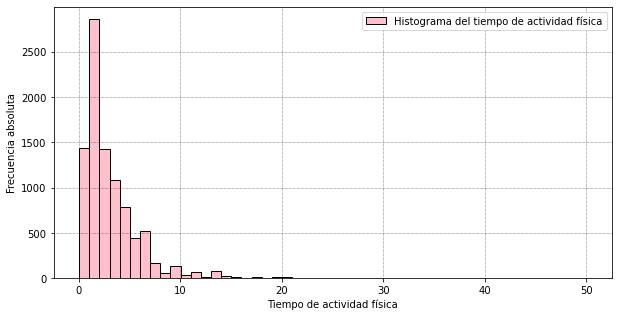

In [498]:
plt.hist(tiempo[sin_na],50, color = "pink", ec = "black")
plt.grid()
plt.legend(["Histograma del tiempo de actividad física"])
plt.xlabel("Tiempo de actividad física")
plt.ylabel("Frecuencia absoluta")

In [499]:
stats.skew(tiempo[sin_na])

3.0842026562859153

**Conclusión**: A traves de la gráfica de distribución de probabilidad podemos ver que la distribución es asimétrica con sesgo positivo, esto nos indica que los tiempos son más dispersos a la derecha de la media; y que la mediana y la moda tienen valores menores que la media.
El cálculo de la correlación mediante "stats.skwe"también nos confirma que la distribución es asimetrica con sesgo a la derecha.
También podemos visualizar que la mayor cantidad de datos se encuentran en el rango de 0 a 10 horas

Text(0, 0.5, 'Frecuencia relativa')

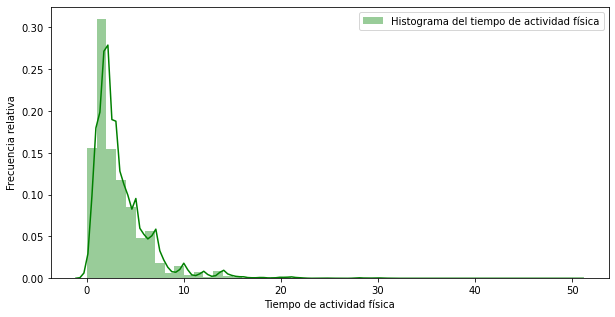

In [500]:
sns.distplot(tiempo[sin_na], bins =50,  color = "green")
plt.legend(["Histograma del tiempo de actividad física"])
plt.xlabel("Tiempo de actividad física")
plt.ylabel("Frecuencia relativa")

**Conclusión**: En el rango de 2 a 3 horas se concentra aproximadamente el 30% de la información

#### BOXPLOT tiempo de actividad física

Text(0, 0.5, 'Tiempo de actividad física')

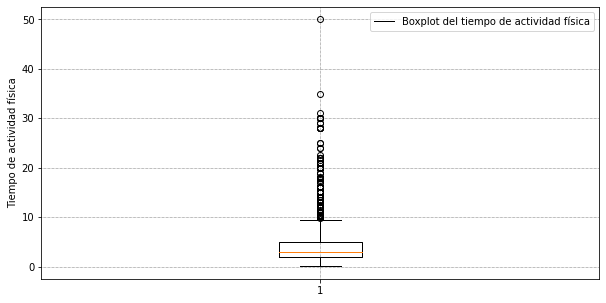

In [501]:
plt.boxplot(tiempo[sin_na])
plt.grid()
plt.legend(["Boxplot del tiempo de actividad física"])
plt.ylabel("Tiempo de actividad física")


**Conclusión:** EL diagrama de caja bigote nos muestra el valor de la mediana aproximadamente 3 y del rango intercuartilico (50% de los datos) entre 2 y 5, los datos de valor 10 o más representan datos atípicos. Además se puede observar que se trata de una distribución asimétrica puesto la mediana no esta en el centro de la caja

#### DIAGRAMA DE DISPERSION edad vs tiempo de actividad fisica

Text(0, 0.5, 'Tiempo de actividad física')

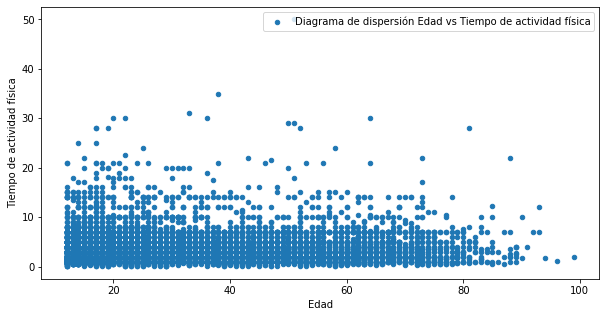

In [502]:
mayores_act.plot(kind='scatter', x= 's1p3', y= 'tiempo')
plt.legend(["Diagrama de dispersión Edad vs Tiempo de actividad física"])
plt.xlabel("Edad")
plt.ylabel("Tiempo de actividad física")

**Conclusión**: El gráfico nos indica que el tiempo de actividad física es levemente menor cuando la edad crece, la tendecia a realizar menos tiempo actividad física cuando se tiene mayor edad es casi imperceptible, solo se puede notar la diferencia entre los rangos de edad de 0 a 20 años y cuando se llega a edades de 70 años o más. Además el tiempo de actividad física se concentra en el rango de 0 a 10 horas. También se puede observar algunos valores atípicos como la actividad física de 50 horas por semana.

#### DIAGRAMA DE DISPERSION edad (s1p3) vs tiempo de actividad fisica vs sexo(s1p2)

Text(0, 0.5, 'Tiempo de actividad física')

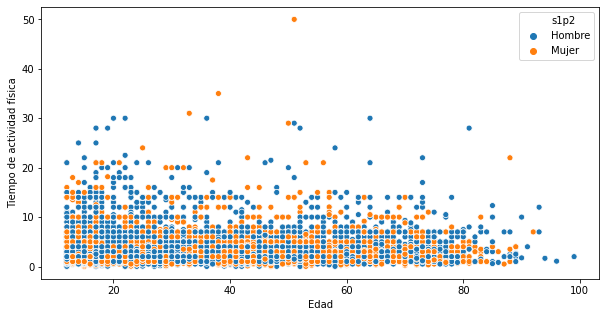

In [503]:
sns.scatterplot(x = mayores_act['s1p3'], y =mayores_act['tiempo'], hue = mayores_act['s1p2'])
plt.xlabel("Edad")
plt.ylabel("Tiempo de actividad física")

**Conclusión**: Los datos de tiempo de actividad física son uniformes respecto al sexo de la persona. De acuerdo al gráfico podriamos decir que no existe diferencia entre el tiempo de actividad física que realizan los hombre y las mujeres.

#### CÁLCULO DE CORRELACIÓN ENTRE LA EDAD Y EL TIEMPO DE ACTIVIDAD FÍSICA

In [504]:
s1p3 = np.array(mayores_act['s1p3'])
np.corrcoef(tiempo[sin_na], s1p3[sin_na])

array([[1.        , 0.04345939],
       [0.04345939, 1.        ]])

**Conclusión**: El factor de correlación de 0,04 nos indica que no existe relación entre las variables edad y tiempo de actividad física semanal.

### - Variables categóricas

#### 1. Uso de bicicleta

In [505]:
#Uso de bicicleta usando factor de expansión (valores absolutos muestrales y con datos expandidos)

s6p1a_freq = mayores_act.groupby(by ='s6p1a').agg({"s6p1a": 'count',"fexp": 'sum'})
s6p1a_freq =pd.DataFrame(s6p1a_freq)
s6p1a_freq.columns = ['f muestral', 'f poblacional']
s6p1a_freq

,f muestral,f poblacional
s6p1a,,
No,29126,1.185755e+07
Si,4110,1.748516e+06


In [506]:
#Uso de bicicleta usando factor de expansión (porcentajes muestrales y con datos expandidos)
s6p1a_freq['f muestral']= s6p1a_freq['f muestral']*100/s6p1a_freq['f muestral'].sum()
s6p1a_freq['f poblacional']= s6p1a_freq['f poblacional']*100/s6p1a_freq['f poblacional'].sum()
s6p1a_freq_p=pd.DataFrame(s6p1a_freq)
s6p1a_freq_p.columns = ['% muestral', '% poblacional']
s6p1a_freq_p

,% muestral,% poblacional
s6p1a,,
No,87.633891,87.148996
Si,12.366109,12.851004


#### Gráfico de tarta

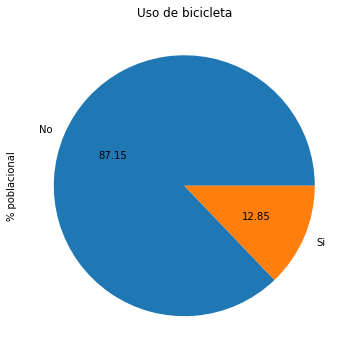

In [507]:
plot = s6p1a_freq_p['% poblacional'].plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Uso de bicicleta')

- **Conclusión**: Un 12,85% de personas mayores de 12 años usan bicicleta según la encuesta. Se debería promover campañas e implementar infraestructura adecuada para incrementar el uso de bicicleta enfocado en la conciencia ambiental y para mejorar la salud de la ciudadania.

#### Uso de bicicleta segun sexo

In [539]:
#valores absolutos muestrales y con datos expandidos
s6p1a_s1p2_freq = mayores_act.groupby(by =['s6p1a','s1p2']).agg({"s6p1a": 'count',"fexp": 'sum'})
s6p1a_s1p2_freq.columns = ['f muestral', 'f poblacional']
s6p1a_s1p2_freq


f muestral  f poblacional
s6p1a s1p2                             
No    Hombre       13306   5.415332e+06
      Mujer        15820   6.442217e+06
Si    Hombre        2923   1.243732e+06
      Mujer         1187   5.047837e+05

In [509]:
#Uso de bicicleta segun sexo (valores porcentuales muestrales y con datos expandidos)
s6p1a_s1p2_freq['f muestral']= s6p1a_s1p2_freq['f muestral']*100/s6p1a_s1p2_freq['f muestral'].sum()
s6p1a_s1p2_freq['f poblacional']= s6p1a_s1p2_freq['f poblacional']*100/s6p1a_s1p2_freq['f poblacional'].sum()
s6p1a_s1p2_freq_p=pd.DataFrame(s6p1a_s1p2_freq)
s6p1a_s1p2_freq_p.columns = ['% muestral', '% poblacional']
s6p1a_s1p2_freq_p

% muestral  % poblacional
s6p1a s1p2                             
No    Hombre   40.034902      39.800868
      Mujer    47.598989      47.348128
Si    Hombre    8.794680       9.141013
      Mujer     3.571429       3.709990

#### Gráfico de barras

Text(0, 0.5, '% Uso de bicicleta')

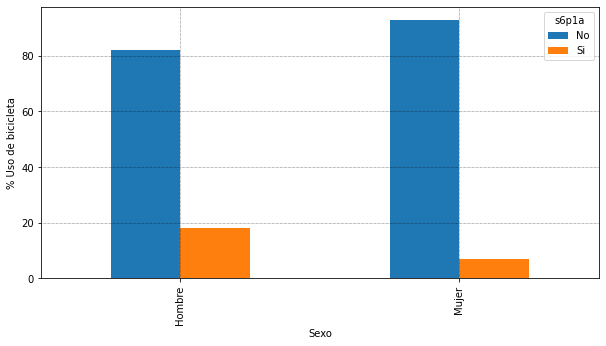

In [510]:
plot = pd.crosstab(index=mayores_act['s1p2'], columns=mayores_act['s6p1a']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.grid()
plt.xlabel("Sexo")
plt.ylabel("% Uso de bicicleta")

- **Conclusión**: Del 12,85% de personas mayores de 12 años que usan bicicleta, el 9,14% son hombres y el 3,71% son mujeres. En el gráfíco también podemos notar esta diferencia.

#### Uso de bicicleta según área

In [511]:
#Uso de bicicleta segun area (valores absolutos muestrales y con datos expandidos)
s6p1a_area_freq = mayores_act.groupby(by =['s6p1a','area']).agg({"s6p1a": 'count',"fexp": 'sum'})
s6p1a_area_freq.columns = ['f muestral', 'f poblacional']
s6p1a_area_freq

f muestral  f poblacional
s6p1a area                             
No    Rural        11409   3.784915e+06
      Urbano       17717   8.072634e+06
Si    Rural         1245   4.313785e+05
      Urbano        2865   1.317137e+06

In [512]:
#Uso de bicicleta segun area (valores porcentuales muestrales y con datos expandidos)
s6p1a_area_freq['f muestral']= s6p1a_area_freq['f muestral']*100/s6p1a_area_freq['f muestral'].sum()
s6p1a_area_freq['f poblacional']= s6p1a_area_freq['f poblacional']*100/s6p1a_area_freq['f poblacional'].sum()
s6p1a_area_freq_p=pd.DataFrame(s6p1a_area_freq)
s6p1a_area_freq_p.columns = ['% muestral', '% poblacional']
s6p1a_area_freq_p

% muestral  % poblacional
s6p1a area                             
No    Rural    34.327236      27.817849
      Urbano   53.306655      59.331147
Si    Rural     3.745938       3.170487
      Urbano    8.620171       9.680517

#### Gráfico de barras

Text(0, 0.5, '% Uso de bicicleta')

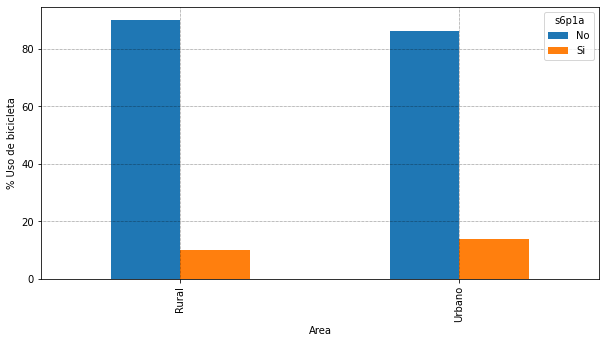

In [513]:
plot = pd.crosstab(index=mayores_act['area'], columns=mayores_act['s6p1a']).apply(lambda r: r/r.sum() *100, 
                                                                                  axis=1).plot(kind='bar')

plt.grid()
plt.xlabel("Area")
plt.ylabel("% Uso de bicicleta")

- **Conclusión**: Del 12,85% de personas mayores de 12 años usan bicicleta 9,68% son del area urbana y 3,17% son de la zona rural. Sin embargo en la gráfica podemos observar que la diferencia porcentual entre las personas que usan bicicleta en la zona rural y urbana, no es tan amplia.

#### Frecuencia del uso de bicicleta

In [514]:
#Filtrar personas que usan bicicleta.

frecuencia_bc = mayores_act[mayores_act.s6p1a == "Si"]
frecuencia_bc = pd.DataFrame(frecuencia_bc)
frecuencia_bc.shape

(4110, 16)

In [515]:
#Frecuencia del uso de bicicleta usando factor de expansión (valores absolutos muestrales y con datos expandidos)

s6p1b_freq = frecuencia_bc.groupby(by = 's6p1b').agg({"s6p1b": 'count',"fexp": 'sum'})
s6p1b_freq =pd.DataFrame(s6p1b_freq)
s6p1b_freq.columns = ['f muestral', 'f poblacional']
s6p1b_freq


,f muestral,f poblacional
s6p1b,,
,0,0.000000
Diario,1420,598589.826411
UnoAnio,161,70563.777024
UnoMes,692,291526.520717
UnoSemana,1837,787835.832985


In [516]:
#Frecuencia del uso de bicicleta usando factor de expansión (porcentajes muestrales y con datos expandidos)
s6p1b_freq['f muestral']= s6p1b_freq['f muestral']*100/s6p1b_freq['f muestral'].sum()
s6p1b_freq['f poblacional']= s6p1b_freq['f poblacional']*100/s6p1b_freq['f poblacional'].sum()
s6p1b_freq_p=pd.DataFrame(s6p1b_freq)
s6p1b_freq_p.columns = ['% muestral', '% poblacional']
s6p1b_freq_p

,% muestral,% poblacional
s6p1b,,
,0.000000,0.000000
Diario,34.549878,34.234164
UnoAnio,3.917275,4.035638
UnoMes,16.836983,16.672797
UnoSemana,44.695864,45.057400


#### Gráfico de tarta

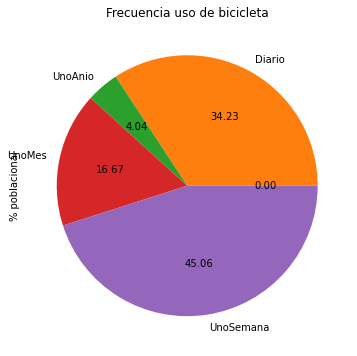

In [517]:
plot = s6p1b_freq_p['% poblacional'].plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Frecuencia uso de bicicleta')

**Conclusión:** El uso mas frecuente que las personas le dan a la bicicleta es una vez por semana con el **45,06%**

#### 2. Tipo de transporte en la rutina diaria

In [518]:
#Tipo de transporte usando factor de expansión (valores absolutos muestrales y con datos expandidos)

s6p2_freq = mayores_act.groupby(by ='s6p2').agg({"s6p2": 'count',"fexp": 'sum'})
s6p2_freq =pd.DataFrame(s6p2_freq)
s6p2_freq.columns = ['f muestral', 'f poblacional']
s6p2_freq

,f muestral,f poblacional
s6p2,,
AutoCompartido,4096,1.690715e+06
AutoSolo,3415,1.407550e+06
Bicicleta,559,2.222137e+05
Caminar,5392,2.003979e+06
No aplica,332,1.355273e+05
Otro,421,1.617630e+05
TPublico,19021,7.984318e+06


In [519]:
#Uso de bicicleta usando factor de expansión (porcentajes muestrales y con datos expandidos)
s6p2_freq['f muestral']= s6p2_freq['f muestral']*100/s6p2_freq['f muestral'].sum()
s6p2_freq['f poblacional']= s6p2_freq['f poblacional']*100/s6p2_freq['f poblacional'].sum()
s6p2_freq_p=pd.DataFrame(s6p2_freq)
s6p2_freq_p.columns = ['% muestral', '% poblacional']
s6p2_freq_p

,% muestral,% poblacional
s6p2,,
AutoCompartido,12.323986,12.426186
AutoSolo,10.275003,10.345019
Bicicleta,1.681911,1.633196
Caminar,16.223372,14.728569
No aplica,0.998917,0.996080
Otro,1.266699,1.188903
TPublico,57.230112,58.682047


#### Gráfico de tarta

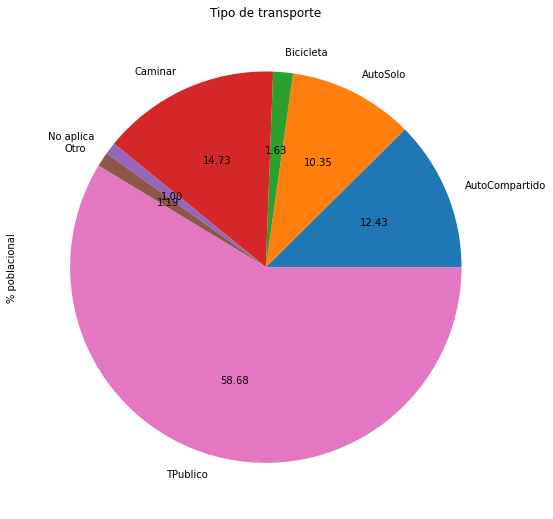

In [520]:
plot = s6p2_freq_p['% poblacional'].plot(kind='pie', autopct='%.2f', figsize=(9, 9), title='Tipo de transporte')

**Conclusión:** La mayoria de personas **58,58%** usan transporte público en su rutina diaria, seguido de la opción caminar con el **14,73%**. Al ser el transporte público el medio mas usado, los gobiernos deberian fomentar y gestionar el mejoramiento de la calidad de servicio de transporte público. Adicionalmente, debido a la pandemia esta información deberia alertar a las autoridades acerca del uso adecuado de este medio de transporte.

#### Razón principal para usar el medio de transporte declarado

In [521]:
#Filtrar personas que no declararon medio de transporte.

medio_tr = mayores_act[mayores_act.s6p2 != "No aplica"]
medio_tr = pd.DataFrame(medio_tr)
medio_tr.shape

(32904, 16)

In [522]:
#Razon uso de transporte utilizando factor de expansión (valores absolutos muestrales y con datos expandidos)

s6p3_freq = medio_tr.groupby(by ='s6p3').agg({"s6p3": 'count',"fexp": 'sum'})
s6p3_freq =pd.DataFrame(s6p3_freq)
s6p3_freq.columns = ['f muestral', 'f poblacional']
s6p3_freq

,f muestral,f poblacional
s6p3,,
,0,0.000000e+00
AhorroDinero,2880,1.232376e+06
Cercania,2992,1.112628e+06
Comodidad,4799,1.948216e+06
ConcienciaAmbiental,36,1.632422e+04
Necesidad,20400,8.395134e+06
Salud/Deporte,447,1.794610e+05
Seguridad,1350,5.863982e+05


In [523]:
#Razon uso de transporte utilizando factor de expansión (porcentajes muestrales y con datos expandidos)
s6p3_freq['f muestral']= s6p3_freq['f muestral']*100/s6p3_freq['f muestral'].sum()
s6p3_freq['f poblacional']= s6p3_freq['f poblacional']*100/s6p3_freq['f poblacional'].sum()
s6p3_freq_p=pd.DataFrame(s6p3_freq)
s6p3_freq_p.columns = ['% muestral', '% poblacional']
s6p3_freq_p

,% muestral,% poblacional
s6p3,,
,0.000000,0.000000
AhorroDinero,8.752735,9.148675
Cercania,9.093119,8.259714
Comodidad,14.584853,14.462796
ConcienciaAmbiental,0.109409,0.121185
Necesidad,61.998541,62.322191
Salud/Deporte,1.358497,1.332248
Seguridad,4.102845,4.353191


#### Grafico de tarta

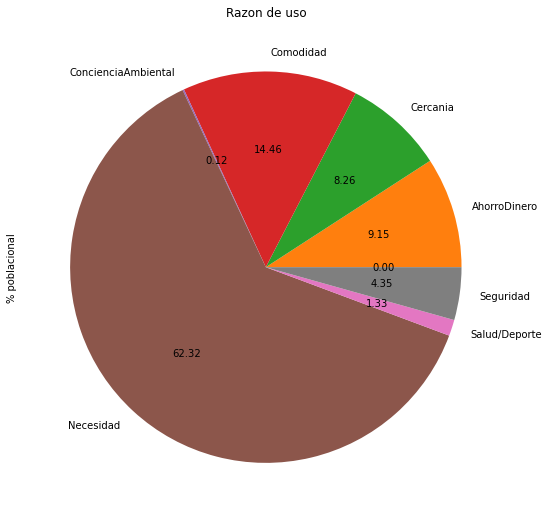

In [524]:
plot = s6p3_freq_p['% poblacional'].plot(kind='pie', autopct='%.2f', figsize=(9, 9), title='Razon de uso')

**Conclusión:** La mayoria de personas **62,32%** usan un medio de transporte determinado por necesidad, seguido de la opción comodidad con el **14,46%**.

#### Medio de transporte usado vs razón de uso

In [525]:
#valores absolutos muestrales y con datos expandidos
s6p2_s6p3_freq = medio_tr.groupby(by =['s6p2','s6p3']).agg({"s6p2": 'count',"fexp": 'sum'})
s6p2_s6p3_freq.columns = ['f muestral', 'f poblacional']

##porcentajes muestrales y con datos expandidos
s6p2_s6p3_freq['f muestral']= s6p2_s6p3_freq['f muestral']*100/s6p2_s6p3_freq['f muestral'].sum()
s6p2_s6p3_freq['f poblacional']= s6p2_s6p3_freq['f poblacional']*100/s6p2_s6p3_freq['f poblacional'].sum()
s6p2_s6p3_freq_p=pd.DataFrame(s6p2_s6p3_freq)
s6p2_s6p3_freq_p.columns = ['% muestral', '% poblacional']
sin_na_1 = ~np.isnan(s6p2_s6p3_freq_p['% poblacional'])
s6p2_s6p3_freq_p[sin_na_1]


% muestral  % poblacional
s6p2           s6p3                                          
AutoCompartido AhorroDinero           0.246171       0.269425
               Cercania               0.051665       0.051090
               Comodidad              5.339776       5.328640
               ConcienciaAmbiental    0.003039       0.002996
               Necesidad              5.333698       5.282424
               Salud/Deporte          0.015196       0.018645
               Seguridad              1.458789       1.597986
AutoSolo       AhorroDinero           0.188427       0.200332
               Cercania               0.024313       0.024209
               Comodidad              5.728787       5.738255
               ConcienciaAmbiental    0.006078       0.007539
               Necesidad              3.403841       3.381242
               Salud/Deporte          0.018235       0.019618
               Seguridad              1.008996       1.077904
Bicicleta      AhorroDinero           0.200584       0.203413
               Cercania               0.258327       0.232785
               Comodidad              0.230975       0.215855
               ConcienciaAmbiental    0.030391       0.029175
               Necesidad              0.717238       0.716070
               Salud/Deporte          0.246171       0.240033
               Seguridad              0.015196       0.012297
Caminar        AhorroDinero           1.510455       1.453815
               Cercania               8.284707       7.486400
               Comodidad              0.726355       0.680184
               ConcienciaAmbiental    0.033431       0.040070
               Necesidad              4.704595       4.110134
               Salud/Deporte          1.008996       0.986566
               Seguridad              0.118527       0.119584
Otro           AhorroDinero           0.094213       0.094555
               Cercania               0.048626       0.040403
               Comodidad              0.224897       0.228809
               Necesidad              0.850960       0.776889
               Salud/Deporte          0.012157       0.012174
               Seguridad              0.048626       0.048035
TPublico       AhorroDinero           6.512886       6.927135
               Cercania               0.425480       0.424826
               Comodidad              2.334063       2.271052
               ConcienciaAmbiental    0.036470       0.041405
               Necesidad             46.988208      48.055433
               Salud/Deporte          0.057744       0.055212
               Seguridad              1.452711       1.497386

**Conclusión:** La relación más frecuente entre el medio de trasporte usado en la rutina diaria y la razón de uso es el transporte público por necesidad **46,99%** seguido de caminar por cercania **8,28%**

#### Tipo de transporte vs area

#### Gráfico de barras

Text(0, 0.5, '% de uso')

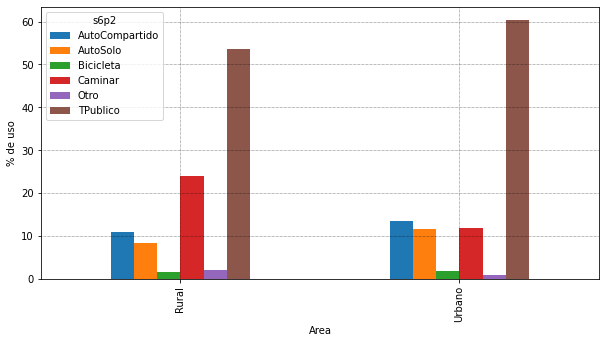

In [526]:
plot = pd.crosstab(index=medio_tr['area'], columns=mayores_act['s6p2']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.grid()
plt.xlabel("Area")
plt.ylabel("% de uso")

**Conclusión:** Del gráfico podemos concluir que en el área urbana es más frecuente el uso del transporte público en comparación con el aréa rural, mientras que en el área rural se camina mas que en el área urbana.

#### 3. Actividad física semanal

In [527]:
#Tipo de transporte usando factor de expansión (valores absolutos muestrales y con datos expandidos)

s6p4_freq = mayores_act.groupby(by ='s6p4').agg({"s6p4": 'count',"fexp": 'sum'})
s6p4_freq =pd.DataFrame(s6p4_freq)
s6p4_freq.columns = ['f muestral', 'f poblacional']
s6p4_freq

,f muestral,f poblacional
s6p4,,
No,23999,9.696417e+06
Si,9237,3.909648e+06


In [528]:
#Uso de bicicleta usando factor de expansión (porcentajes muestrales y con datos expandidos)
s6p4_freq['f muestral']= s6p4_freq['f muestral']*100/s6p4_freq['f muestral'].sum()
s6p4_freq['f poblacional']= s6p4_freq['f poblacional']*100/s6p4_freq['f poblacional'].sum()
s6p4_freq_p=pd.DataFrame(s6p4_freq)
s6p4_freq_p.columns = ['% muestral', '% poblacional']
s6p4_freq_p

,% muestral,% poblacional
s6p4,,
No,72.207847,71.265403
Si,27.792153,28.734597


#### Gráfico de tarta

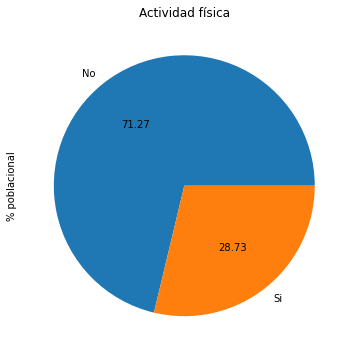

In [529]:
plot = s6p4_freq_p['% poblacional'].plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Actividad física')

**Conclusión:** El porcentaje de personas que realizan ejercicio físico semanal es el 28,73%. Se deben realizar campañas para promover el ejercicio físico continuo, la falta de ejercicio es un factor importante para desarrollar enfermedades graves como la obesidad, por lo tanto este es un asunto de salud pública que debe ser gestionado de manera adecuada.

#### Actividad física según sexo

In [530]:
#valores absolutos muestrales y con datos expandidos
s6p4_s1p2_freq = mayores_act.groupby(by =['s6p4','s1p2']).agg({"s6p4": 'count',"fexp": 'sum'})
s6p4_s1p2_freq.columns = ['f muestral', 'f poblacional']
s6p4_s1p2_freq

f muestral  f poblacional
s6p4 s1p2                             
No   Hombre       10700   4.342453e+06
     Mujer        13299   5.353964e+06
Si   Hombre        5529   2.316611e+06
     Mujer         3708   1.593037e+06

In [531]:
#valores porcentuales muestrales y con datos expandidos
s6p4_s1p2_freq['f muestral']= s6p4_s1p2_freq['f muestral']*100/s6p4_s1p2_freq['f muestral'].sum()
s6p4_s1p2_freq['f poblacional']= s6p4_s1p2_freq['f poblacional']*100/s6p4_s1p2_freq['f poblacional'].sum()
s6p4_s1p2_freq_p=pd.DataFrame(s6p4_s1p2_freq)
s6p4_s1p2_freq_p.columns = ['% muestral', '% poblacional']
s6p4_s1p2_freq_p

% muestral  % poblacional
s6p4 s1p2                             
No   Hombre   32.194006      31.915571
     Mujer    40.013840      39.349832
Si   Hombre   16.635576      17.026310
     Mujer    11.156577      11.708287

#### Gráfico de barras

Text(0, 0.5, '% Actividad física')

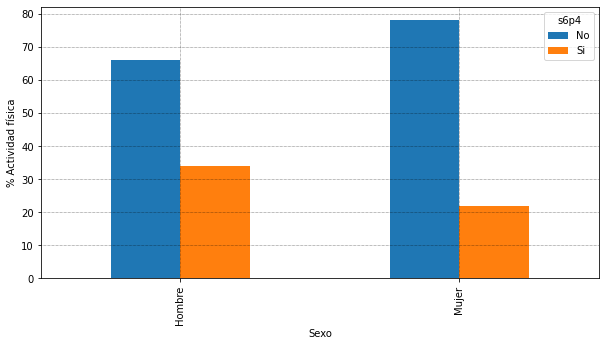

In [532]:
plot = pd.crosstab(index=mayores_act['s1p2'], columns=mayores_act['s6p4']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.grid()
plt.xlabel("Sexo")
plt.ylabel("% Actividad física")

**Conclusión:** De la gráfica se puede concluir que los hombres realizan actividad fisica semanal en mayor proporción que las mujeres.

#### Actividad física según área

In [533]:
#valores absolutos muestrales y con datos expandidos
s6p4_area_freq = mayores_act.groupby(by =['s6p4','area']).agg({"s6p4": 'count',"fexp": 'sum'})
s6p4_area_freq.columns = ['f muestral', 'f poblacional']
s6p4_area_freq

f muestral  f poblacional
s6p4 area                             
No   Rural         9773   3.219703e+06
     Urbano       14226   6.476715e+06
Si   Rural         2881   9.965906e+05
     Urbano        6356   2.913057e+06

In [534]:
#valores porcentuales muestrales y con datos expandidos
s6p4_area_freq['f muestral']= s6p4_area_freq['f muestral']*100/s6p4_area_freq['f muestral'].sum()
s6p4_area_freq['f poblacional']= s6p4_area_freq['f poblacional']*100/s6p4_area_freq['f poblacional'].sum()
s6p4_area_freq_p=pd.DataFrame(s6p4_area_freq)
s6p4_area_freq_p.columns = ['% muestral', '% poblacional']
s6p4_area_freq_p

% muestral  % poblacional
s6p4 area                             
No   Rural    29.404862      23.663731
     Urbano   42.802985      47.601672
Si   Rural     8.668311       7.324605
     Urbano   19.123842      21.409992

#### Gráfico de barras

Text(0, 0.5, '% Actividad física')

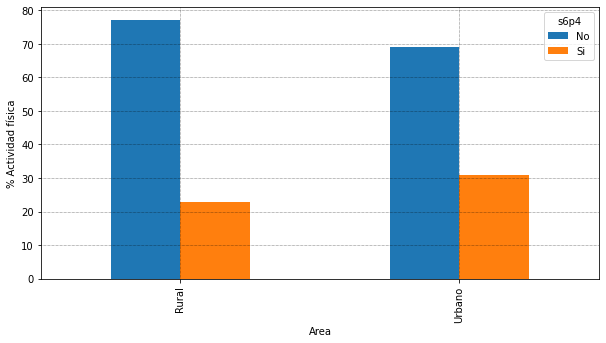

In [535]:
plot = pd.crosstab(index=mayores_act['area'], columns=mayores_act['s6p4']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.grid()
plt.xlabel("Area")
plt.ylabel("% Actividad física")

**Conclusión:** De la gráfica se puede concluir que en el área urbana se realiza actividad fisica semanal en mayor proporción que en el área rural. Generalmente en el área rural se tienen empleos que requieren más esfuerzo físico, esta podría ser una causa para que las personas en área rural realicen menos actividades de acondicionamiento físico.

#### Actividad física según nivel de instrucción

In [536]:
#valores absolutos muestrales y con datos expandidos
s6p4_s1p12a_freq = mayores_act.groupby(by =['s6p4','s1p12a']).agg({"s6p4": 'count',"fexp": 'sum'})
s6p4_s1p12a_freq.columns = ['f muestral', 'f poblacional']
s6p4_s1p12a_freq

f muestral  f poblacional
s6p4 s1p12a                                   
No   Alfabetizacion         103   3.838536e+04
     Bachillerato          3284   1.317514e+06
     Basica                2382   1.041702e+06
     Jardin                   3   1.411951e+03
     Ninguno               1446   5.384759e+05
     Postgrado              159   6.841563e+04
     Primaria              7830   2.948359e+06
     Secundaria            5331   2.233684e+06
     Superior              3007   1.308130e+06
     Tecnologica            454   2.003389e+05
Si   Alfabetizacion          12   4.379180e+03
     Bachillerato          1955   7.790472e+05
     Basica                2108   9.716433e+05
     Jardin                   0            NaN
     Ninguno                 63   2.550748e+04
     Postgrado              161   7.075429e+04
     Primaria              1112   4.411592e+05
     Secundaria            1710   7.094764e+05
     Superior              1853   7.993769e+05
     Tecnologica            263   1.083040e+05

In [537]:
#valores porcentuales muestrales y con datos expandidos
s6p4_s1p12a_freq['f muestral']= s6p4_s1p12a_freq['f muestral']*100/s6p4_s1p12a_freq['f muestral'].sum()
s6p4_s1p12a_freq['f poblacional']= s6p4_s1p12a_freq['f poblacional']*100/s6p4_s1p12a_freq['f poblacional'].sum()
s6p4_s1p12a_freq_p=pd.DataFrame(s6p4_s1p12a_freq)
s6p4_s1p12a_freq_p.columns = ['% muestral', '% poblacional']
s6p4_s1p12a_freq_p

% muestral  % poblacional
s6p4 s1p12a                                   
No   Alfabetizacion    0.309905       0.282119
     Bachillerato      9.880852       9.683284
     Basica            7.166927       7.656162
     Jardin            0.009026       0.010377
     Ninguno           4.350704       3.957616
     Postgrado         0.478397       0.502832
     Primaria         23.558792      21.669446
     Secundaria       16.039836      16.416829
     Superior          9.047418       9.614313
     Tecnologica       1.365989       1.472424
Si   Alfabetizacion    0.036105       0.032186
     Bachillerato      5.882176       5.725735
     Basica            6.342520       7.141251
     Jardin            0.000000            NaN
     Ninguno           0.189553       0.187471
     Postgrado         0.484414       0.520020
     Primaria          3.345770       3.242372
     Secundaria        5.145023       5.214413
     Superior          5.575280       5.875152
     Tecnologica       0.791311       0.795998

#### Gráfico de barras

Text(0, 0.5, '% Actividad física')

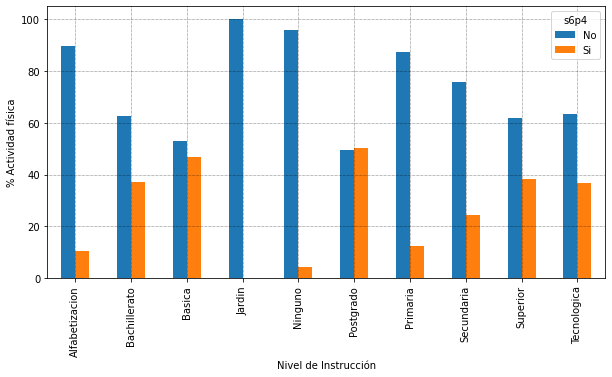

In [538]:
plot = pd.crosstab(index=mayores_act['s1p12a'], columns=mayores_act['s6p4']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
plt.grid()
plt.xlabel("Nivel de Instrucción")
plt.ylabel("% Actividad física")

**Conclusión:** De la gráfica se puede concluir que a nivel porcentual, las personas que tienen un nivel de postgrado realizan  actividad física en mayor proporción.

***Elaborado por: Diana Méndez***